# Cryptocurency Data Analysis

Provide some analysis about the price changemente through the last 5 years.

## Imports and definitions

In [1]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime as dt

import pandas as pd
# pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader.data as web
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import matplotlib.dates as mdates
# import plotly.express as px

### Datasource and DataFrame column

In [3]:
datasource = 'yahoo'
close = "Adj Close"

### Select the Data Range

In [4]:
start = dt.date(dt.date.today().year - 5, 1, 1)
end = dt.date.today()

### Select Tickets

In [5]:
labels = ['BTC', 'ETH', 'DOGE', 'BNB', 'ADA', 'DASH', 'XRP']
locale = 'USD'

## Load Downloaded data

In [6]:
crypto = pd.DataFrame()
crypto['Date'] = pd.date_range(start=start, end=end, freq='D')

In [7]:
for label in labels:
    ticker = '{}-{}'.format(label, locale)

    crp = web.DataReader(ticker, datasource, start, end)
    crp.reset_index(inplace=True)    
    
    crypto[label] = crp[close]
    crypto['{}_7DAY'.format(label)] = crypto[label].rolling(7).mean()

In [8]:
# Reindex the crypto datasert
crypto.set_index("Date", inplace=True)

## Correlation Map

<AxesSubplot:>

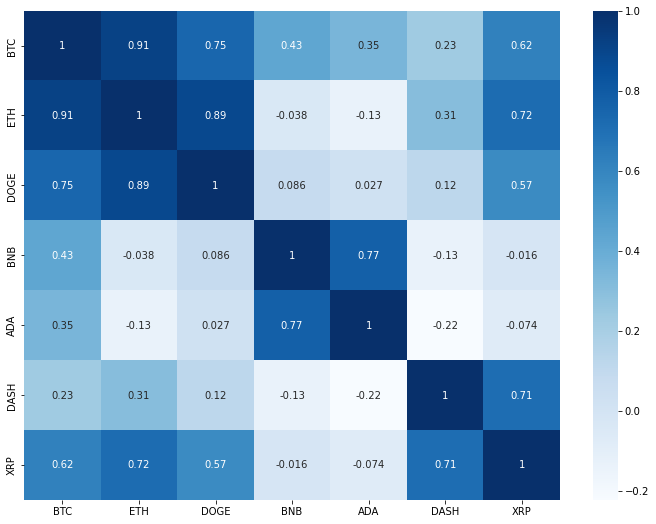

In [9]:
plt.figure(figsize = (12, 9))
sns.heatmap(crypto[labels].corr(),annot=True, cmap='Blues')

## Price Compare

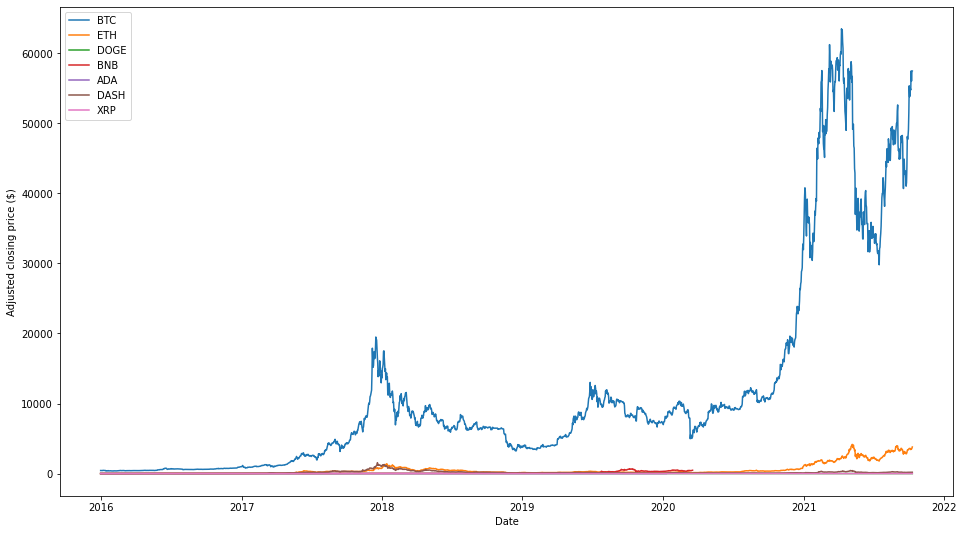

In [11]:
fig, ax = plt.subplots(figsize=(16,9))

for dt in labels:
    ax.plot(crypto.index, crypto[dt], label=dt)
    
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [33]:
labes_7days=list(map(lambda x: '{}_7DAY'.format(x), labels))

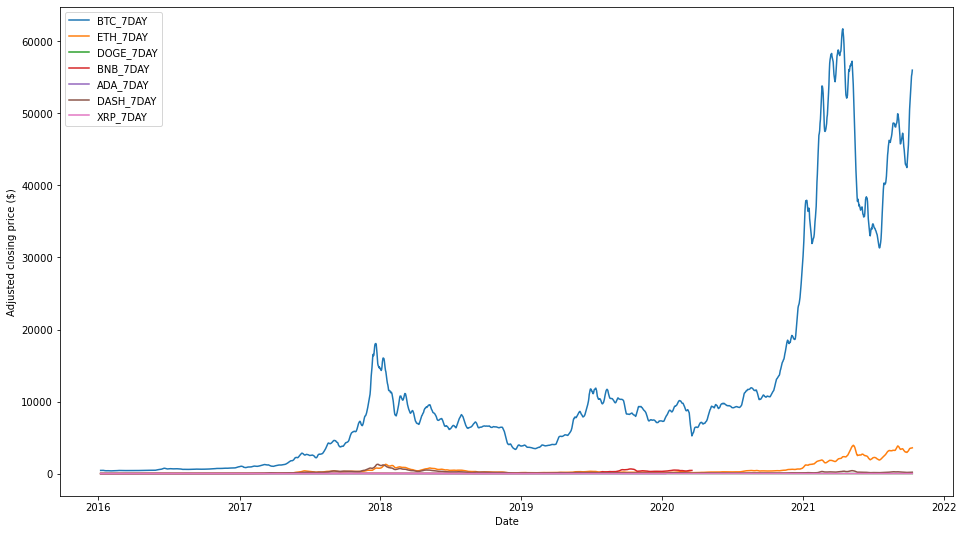

In [35]:
fig, ax = plt.subplots(figsize=(16,9))

for label in labes_7days:
    ax.plot(crypto.index, crypto[label], label=label)
    
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()